# Boston House Prices

Regression predictive modeling machine learning problem from end-to-end Python

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.<br>
The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): <br>

The data dictionary for this dataset is as follows:<br>

| Feature Name | Deatail | Keys |
|--------------|---------|------|
| CRIM | per capita crime rate by town.| Continuous |
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft. | Continuous |
| INDUS | proportion of non-retail business acres per town. | Continuous |
| CHAS | Charles River dummy variable | 1 = tract bounds river; 0 = otherwise |
| NOX | nitric oxides concentration (parts per 10 million) | Continuous |
| RM | average number of rooms per dwelling | Int |
| AGE | proportion of owner-occupied units built prior to 1940 | Continuous |
| DIS | weighted distances to ﬁve Boston employment centers | Continuous |
| RAD | index of accessibility to radial highways | Int |
| TAX | full-value property-tax rate per 10,000 | Continious |
| PTRATIO | pupil-teacher ratio by town | Continuous |
| B | 1000(Bk−0.63)2 where Bk is the proportion of blacks by town | Continous |
| LSTAT | % lower status of the population | Continuous |
| MEDV | Median value of owner-occupied homes in 1000s | Continuous |

In [2]:
# Load libraries
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


## Read CSV files into DataFrame

In [3]:
filename = '/kaggle/input/boston-house-prices/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
Boston = pd.read_csv(filename, delim_whitespace=True, names=names)
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Checking for missing values in train data
total_nan = Boston.isna().sum().sort_values(ascending=False)
percent_nan = (Boston.isna().sum() / Boston.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total_nan, percent_nan], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


## Exploratory Data Analysis

In [5]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


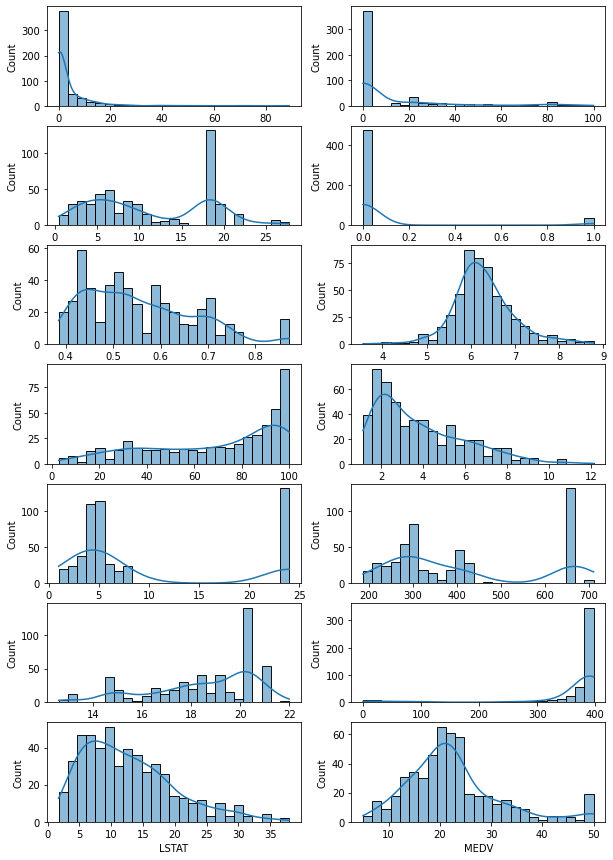

In [6]:
feature = np.reshape(names, (7,2))
fig, axes = plt.subplots(7, 2, figsize=(10, 15))
for i in range(7):
    for j in range(2):
        sns.histplot(data = Boston, x = feature[i][j], bins=25 , kde=True, ax = axes[i,j])

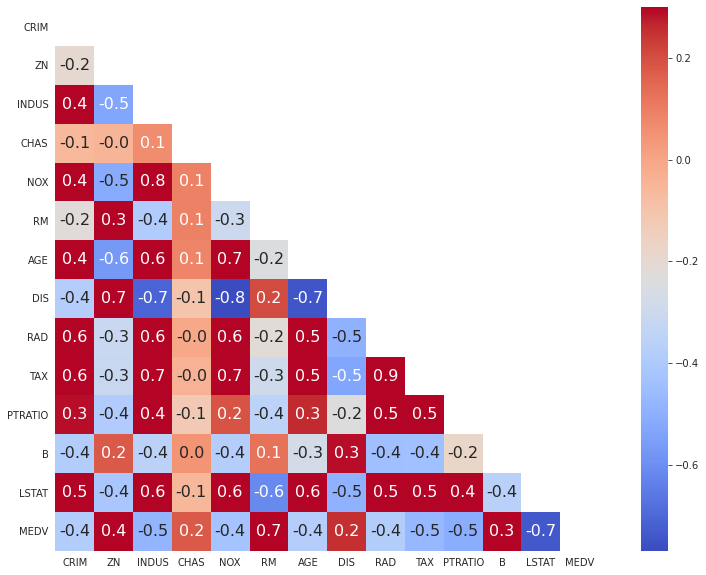

In [7]:
corr = Boston.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True, fmt=".1f",annot_kws={'size':16}, ax = ax)

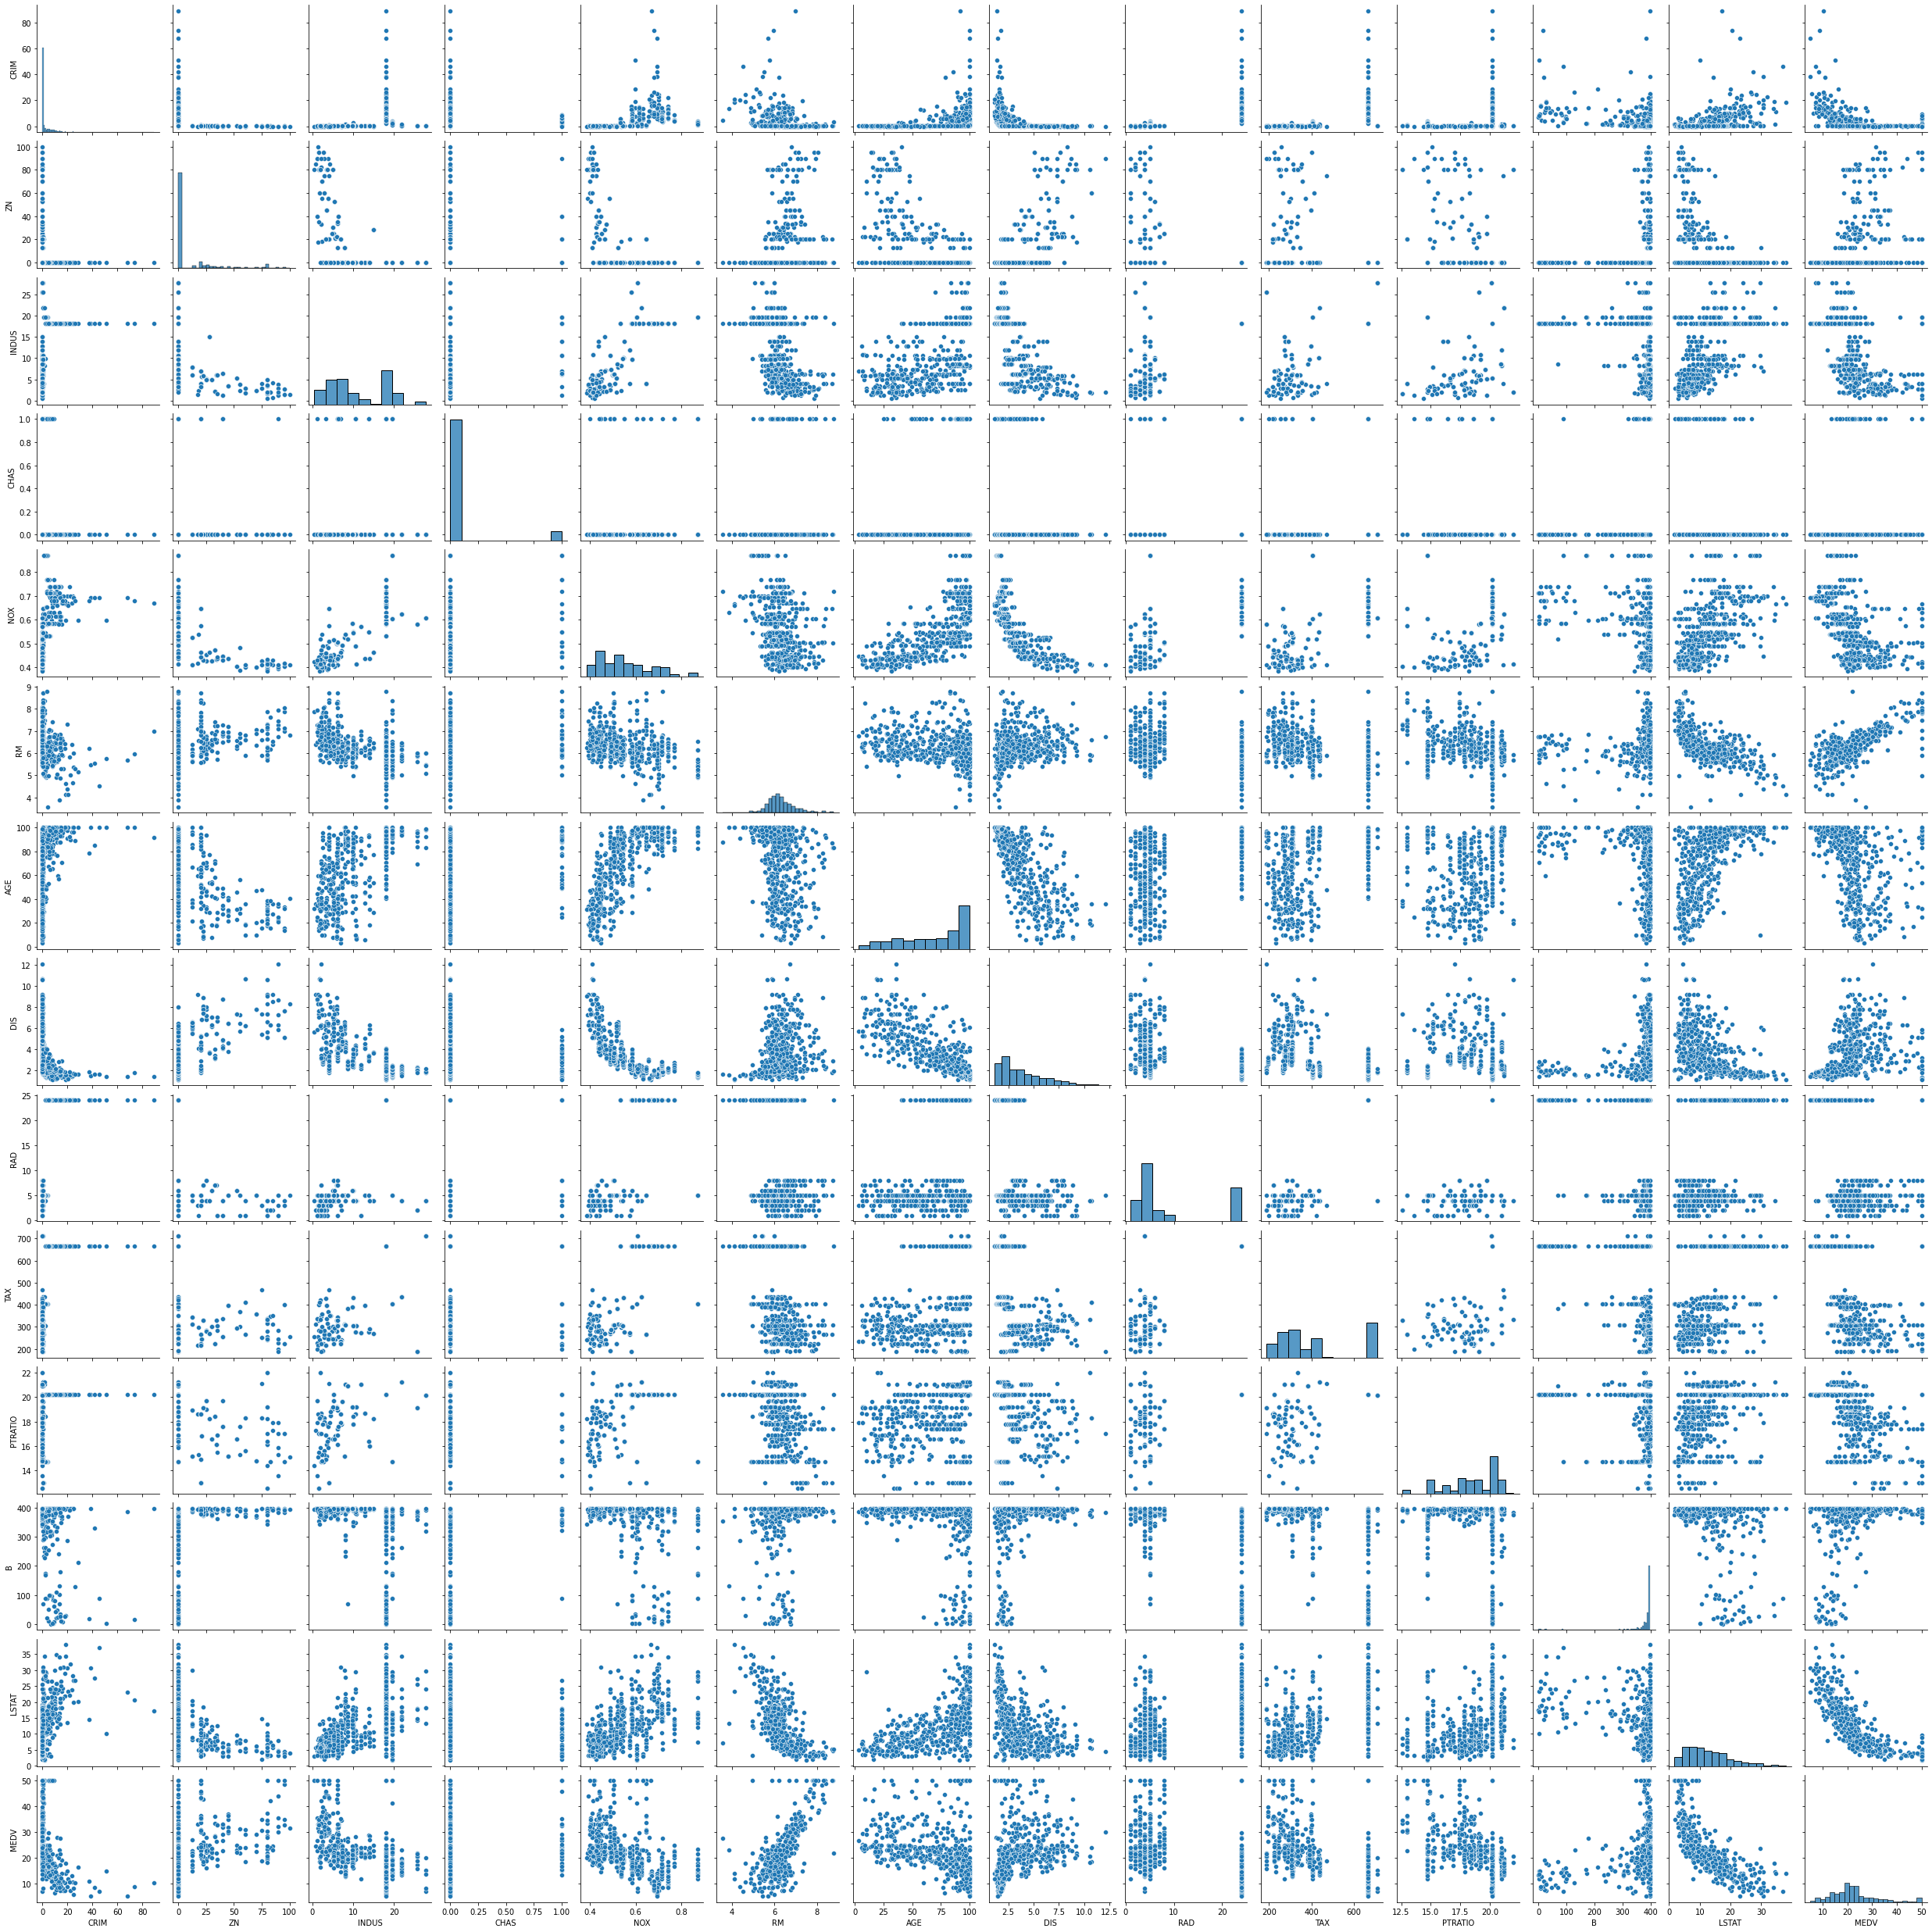

In [8]:
sns.pairplot(data = Boston)

There is a lot of structure in this dataset. We need to think about transforms that we could use
later to better expose the structure which in turn may improve modeling accuracy. So far it
would be worth trying:<br>
- Feature selection and removing the most correlated attributes.
- Normalizing the dataset to reduce the eect of diering scales.
- Standardizing the dataset to reduce the eects of diering distributions.

In [9]:
# Split-out validation dataset
array = Boston.values
X = array[:,0:13]
y = array[:,13]
seed = 70
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=seed)

In [10]:
# Test options and evaluation metric
num_folds = 10
seed = 70
scoring = 'neg_mean_squared_error'

In [11]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [12]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -23.861472 (8.318627)
LASSO: -28.450658 (9.840844)
EN: -27.006587 (9.218852)
KNN: -40.933751 (9.846588)
CART: -24.091137 (11.186932)
SVR: -64.542409 (13.675830)


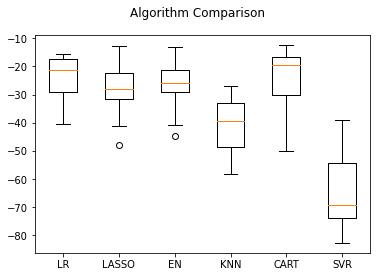

In [13]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -23.861472 (8.318627)
ScaledLASSO: -29.568606 (10.399899)
ScaledEN: -30.971165 (11.229495)
ScaledKNN: -22.718698 (8.765073)
ScaledCART: -24.497706 (10.679091)
ScaledSVR: -31.107574 (10.291434)


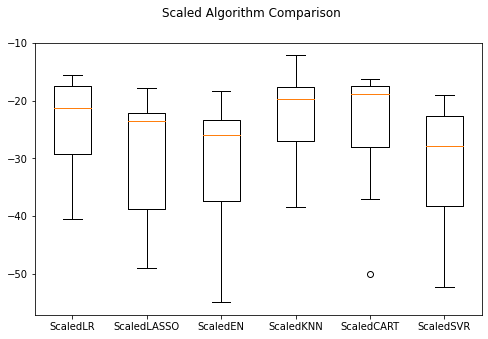

In [15]:
# Compare Algorithms
fig = plt.figure(figsize = (8,5))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [17]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -20.584883 using {'n_neighbors': 3}
-25.209232 (12.147344) with: {'n_neighbors': 1}
-20.584883 (8.624957) with: {'n_neighbors': 3}
-23.354105 (8.683453) with: {'n_neighbors': 5}
-24.184317 (8.806284) with: {'n_neighbors': 7}
-24.106959 (9.714076) with: {'n_neighbors': 9}
-23.720417 (9.600930) with: {'n_neighbors': 11}
-23.926224 (10.356283) with: {'n_neighbors': 13}
-24.723314 (11.055190) with: {'n_neighbors': 15}
-25.401360 (11.293077) with: {'n_neighbors': 17}
-26.259160 (11.591191) with: {'n_neighbors': 19}
-27.187809 (11.654686) with: {'n_neighbors': 21}


In [18]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.364294 (6.969572)
ScaledGBM: -10.899748 (3.853423)
ScaledRF: -16.443576 (6.581788)
ScaledET: -13.323082 (6.371559)


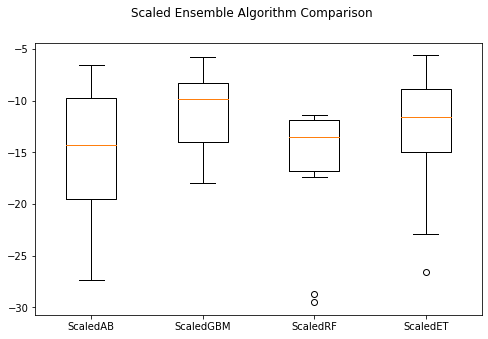

In [19]:
# Compare Algorithms
fig = plt.figure(figsize =  (8,5))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [21]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.294205 using {'n_estimators': 400}
-11.670938 (3.724567) with: {'n_estimators': 50}
-10.981054 (3.427739) with: {'n_estimators': 100}
-10.563238 (3.582160) with: {'n_estimators': 150}
-10.440174 (3.776653) with: {'n_estimators': 200}
-10.361501 (3.881900) with: {'n_estimators': 250}
-10.335484 (3.988487) with: {'n_estimators': 300}
-10.304693 (4.031858) with: {'n_estimators': 350}
-10.294205 (4.045551) with: {'n_estimators': 400}


In [22]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=70)

In [25]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

8.018092740836783
